# Contributors
### Omar Morshdy  211001749
### Omar Shehata  222000109
### Ahmed Kamal   211000202
### Dima Mohamed  211000081
### Ahmad Mustafa 202001536


# competition link
https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer/data

### Import all need libraries

In [1]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage
import os

### check classes

In [2]:
train_path = 'data/train/'

num_classes = 0
class_lables = []
for filename in os.listdir(train_path):
    num_classes += 1
    class_lables.append(filename)

print("Number of classes: ", num_classes)
print(class_lables)


Number of classes:  7
['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


### Data Visualization

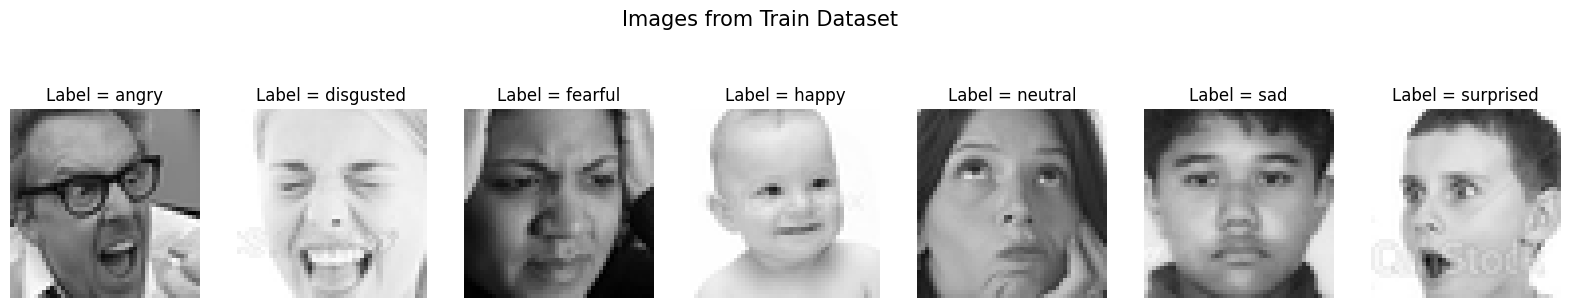

In [3]:
fig, axes = plt.subplots(1, 7, figsize=(20, 4))
fig.suptitle('Images from Train Dataset', fontsize=15)

axes = axes.flatten()

for i, label in enumerate(os.listdir(train_path)):
    if i == len(axes):
        break
    
    label_path = os.path.join(train_path, label)
    
    if os.path.isdir(label_path):
        img_file = [f for f in os.listdir(label_path) if f.lower().endswith(('.png'))]
        
        if img_file:
            random_img = random.choice(img_file)
            
            img_path = os.path.join(label_path, random_img)
            
            img = cv2.imread(img_path)
            
            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(f"Label = {label}")
            axes[i].axis('off')

plt.show()

### Load Images

In [4]:
train_image = []
train_lables = []

for label in class_lables:
    label_path = os.path.join(train_path, label)
    for img_path in os.listdir(label_path):
        img = cv2.imread(os.path.join(label_path, img_path))
        img_gray = rgb2gray(img)
        train_image.append(img_gray)
        train_lables.append(label)


### Normalize images between 0 and 1

In [5]:
train_image = np.array(train_image).astype('float32')
train_image = train_image/255 

## Face and Eye Detection using HAAR Cascade Classifiers

In [6]:
face_classifier = cv2.CascadeClassifier("C:\Python310\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml")

In [10]:
print("Image type:", train_image[0].dtype)
print("Image depth:", train_image[0].ndim)
train_image[0].shape

Image type: float32
Image depth: 2


(48, 48)

In [12]:
if face_classifier.empty():
    print("face classifier don't load successfully")
else:
    faces = face_classifier.detectMultiScale(train_image[0], 1.3, 5)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1389: error: (-215:Assertion failed) scaleFactor > 1 && _image.depth() == CV_8U in function 'cv::CascadeClassifierImpl::detectMultiScale'


In [11]:
if faces is ():
    print("No faces found")

for (x,y,w,h) in faces:
    cv2.rectangle(train_image[0], (x,y), (x+w, y+h), (24,0,48), 2)
    plt.imshow(train_image[0], cmap='gray')
    plt.show()

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\aymanmorshdy\AppData\Local\Temp\ipykernel_7680\3455533567.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
C:\Users\aymanmorshdy\AppData\Local\Temp\ipykernel_7680\3455533567.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
C:\Users\aymanmorshdy\AppData\Local\Temp\ipykernel_7680\3455533567.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


NameError: name 'faces' is not defined